# 1. Thư viện và dữ liệu

In [1]:
# Import các thư viện
import pandas as pd
from src.model.arima import ARIMAModel
from src.processing.aggregate import prepare_level_data

In [2]:
file_path = "../data/time_series_country.csv"
df = pd.read_csv(file_path, sep=",", engine="python")

# 2. Global Level

In [3]:
global_df = prepare_level_data(df, level="global")
global_df

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,16470.0,5.764414e+09,0.285719
1,2001,39212.0,5.742992e+09,0.682780
2,2002,20868.0,5.932354e+09,0.351766
3,2003,113107.0,5.947678e+09,1.901700
4,2004,244611.0,5.914578e+09,4.135731
5,2005,93440.0,6.246842e+09,1.495796
6,2006,29852.0,6.158741e+09,0.484709
7,2007,22377.0,6.339604e+09,0.352972
8,2008,241939.0,6.483756e+09,3.731463
9,2009,15408.0,6.295363e+09,0.244752


In [4]:
global_model = ARIMAModel(global_df)
results = global_model.adf_test(1)
print(results)
# Thực hiện kiểm định ADF
# -H0: Chuỗi không dừng
# -H1: Chuỗi dừng
# => Kết quả kiểm định cho thấy p-value (d = 1) < 0.05
# => Kết luận: Bác bỏ H0, chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 1
ADF Statistic  : -8.915562
p-value        : 1.075109e-14
Stationary     : True

Critical Values:
   1% : -3.752928
   5% : -2.998500
   10% : -2.638967

{'ADF Statistic': -8.915561955017006, 'p-value': 1.0751090010349465e-14, 'Critical Values': {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}, 'Is Stationary': np.True_}


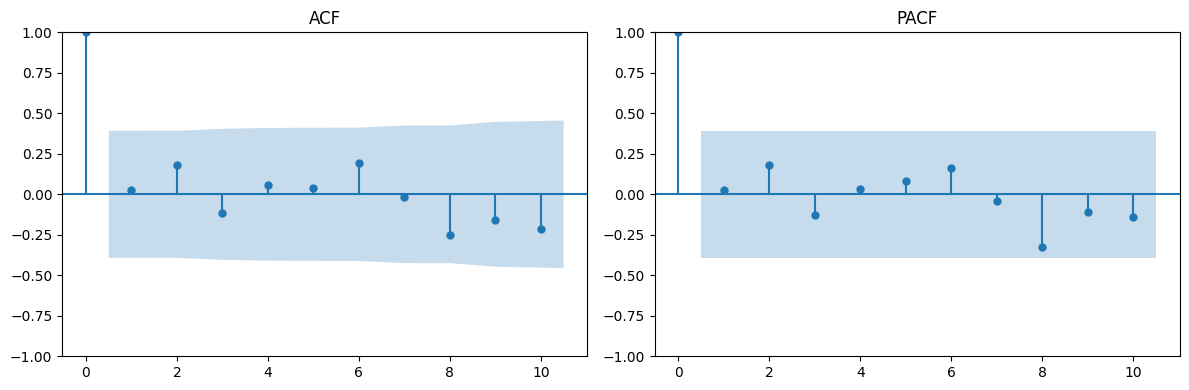

In [5]:
global_model.plot_acf_pacf(10)
# Biểu đồ ACF và PACF cho thấy các lag điều nằm trong vùng tin cậy, có thể bộ số hợp lý p = 0, q = 0

In [6]:
results = global_model.grid_search_expanding(
    p_list=[0,1],
    d_list=[1],
    q_list=[0,1]
)
results
# Bộ tham số (0,1,0) có chỉ số đánh giá MAE, MASE, RMSE tốt hơn

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 1, 0)",100.19,0.2898,0.4444,0.2498,1.0,10
1,"(1, 1, 0)",92.64,0.3066,0.5038,0.2643,1.0,10
2,"(1, 1, 1)",91.30,0.7149,0.8250,0.6163,1.0,10
3,"(0, 1, 1)",89.30,0.7194,0.7965,0.6201,1.0,10


# 3. Region Level

In [7]:
# Các khu vực địa lý
df['Region'].unique()

<StringArray>
[                  'South Asia',      'Europe and Central Asia',
 'Middle East and North Africa',        'East Asia and Pacific',
           'Sub-Saharan Africa',  'Latin America and Caribbean',
                'North America']
Length: 7, dtype: str

## 3.1. South Asia

In [8]:
south_asia = prepare_level_data(df,level='region', filter='South Asia')
south_asia

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,4522.0,1.478332e+09,0.305885
1,2001,22686.0,1.506259e+09,1.506116
2,2002,9072.0,1.534281e+09,0.591287
3,2003,30776.0,1.562026e+09,1.970261
4,2004,54669.0,1.591054e+09,3.436025
5,2005,80956.0,1.617604e+09,5.004685
6,2006,2739.0,1.644702e+09,0.166535
7,2007,9435.0,1.671277e+09,0.564539
8,2008,3687.0,1.696521e+09,0.217327
9,2009,3586.0,1.723322e+09,0.208086


In [9]:
south_asia_model = ARIMAModel(south_asia)
results = global_model.adf_test(1)


========== ADF TEST RESULT ==========
Differencing (d): 1
ADF Statistic  : -8.915562
p-value        : 1.075109e-14
Stationary     : True

Critical Values:
   1% : -3.752928
   5% : -2.998500
   10% : -2.638967



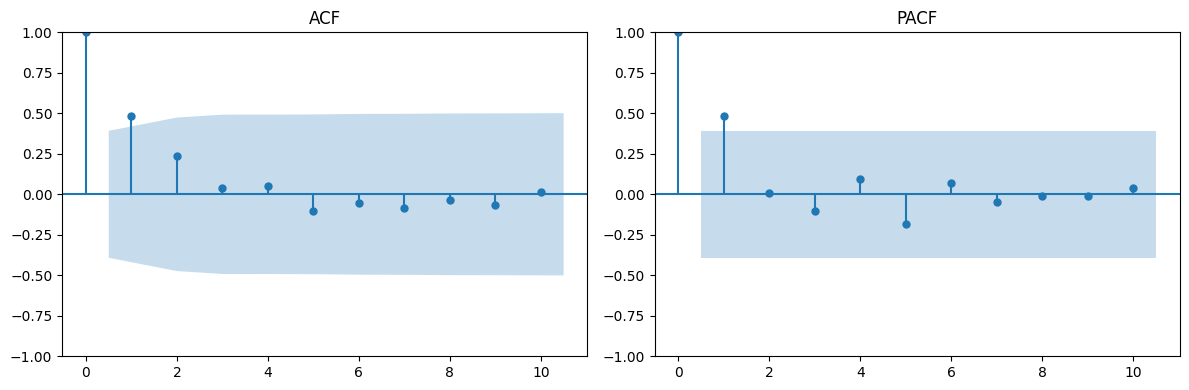

In [10]:
south_asia_model.plot_acf_pacf(10)
# Biểu đồ cho thấy bộ số p = 1, q = 1 có thể phù hợp cho mô hình khu vực South Asia

In [11]:
results = south_asia_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[1],
    q_list=[0, 1]
)
results
# Các mô hình không chêch lệch quá lớn về AIC, bộ tham số (0, 1, 1) tối ưu về các chỉ số đánh giá nhất

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 1, 1)",77.79,0.1503,0.2419,0.2426,1.0,10
1,"(1, 1, 0)",78.60,0.1564,0.2535,0.2525,1.0,10
2,"(0, 1, 0)",78.20,0.1964,0.3066,0.3171,1.0,10
3,"(1, 1, 1)",77.32,0.3032,0.3498,0.4894,1.0,10


## 3.2. Europe and Central Asia

In [12]:
europe_central_asia= prepare_level_data(df,level='region', filter='Europe and Central Asia')
europe_central_asia

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,674.0,635050252.0,0.106133
1,2001,1320.0,561393893.0,0.235129
2,2002,1010.0,600505732.0,0.168192
3,2003,72345.0,650391419.0,11.123302
4,2004,251.0,589578346.0,0.042573
5,2005,1033.0,752877411.0,0.137207
6,2006,4608.0,638495995.0,0.721696
7,2007,871.0,705687931.0,0.123426
8,2008,283.0,637477698.0,0.044394
9,2009,847.0,511110743.0,0.165718


In [13]:
europe_central_asia_model = ARIMAModel(europe_central_asia)
results = europe_central_asia_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -3.688775
p-value        : 4.273839e-03
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



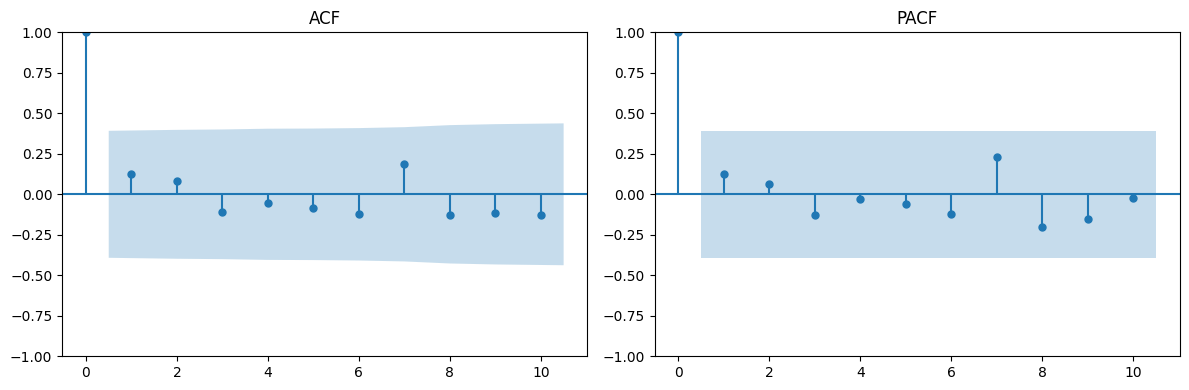

In [14]:
europe_central_asia_model.plot_acf_pacf(10)

In [15]:
results = europe_central_asia_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Dữ liệu tại khu vực Europe và Central Asia có nhiều spike khiến mô hình khó nắm bắt được, các chỉ số tăng cao và độ tin cậy cuủa mô hình giảm sút. Ngoài ra, MASE > 1 phản ánh rằng mô hình ARIMA không phù hợp với dữ liệu ở khu vực này.
# Bộ số (0,0,0) là tối ưu nhất về điểm đánh giá

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",135.82,2.5299,3.6614,1.0762,0.8,10
1,"(1, 0, 0)",137.37,2.7396,3.8305,1.1654,0.7,10
2,"(0, 0, 1)",137.46,3.4306,4.2858,1.4593,0.7,10
3,"(1, 0, 1)",139.31,3.7131,4.3955,1.5795,0.7,10


## 3.3. Middle East and North Africa

In [16]:
middleeast_northafrica= prepare_level_data(df,level='region', filter='Middle East and North Africa')
middleeast_northafrica

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,475.0,289425624.0,0.164118
1,2001,1114.0,213241017.0,0.522414
2,2002,466.0,298121983.0,0.156312
3,2003,2693.0,252715429.0,1.065625
4,2004,852.0,287324471.0,0.296529
5,2005,871.0,211311838.0,0.412187
6,2006,1326.0,242109435.0,0.547686
7,2007,1063.0,208750060.0,0.509221
8,2008,343.0,332683716.0,0.103101
9,2009,346.0,277745469.0,0.124574


In [17]:
middleeast_northafrica_model = ARIMAModel(middleeast_northafrica)
results = middleeast_northafrica_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -4.758273
p-value        : 6.531470e-05
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



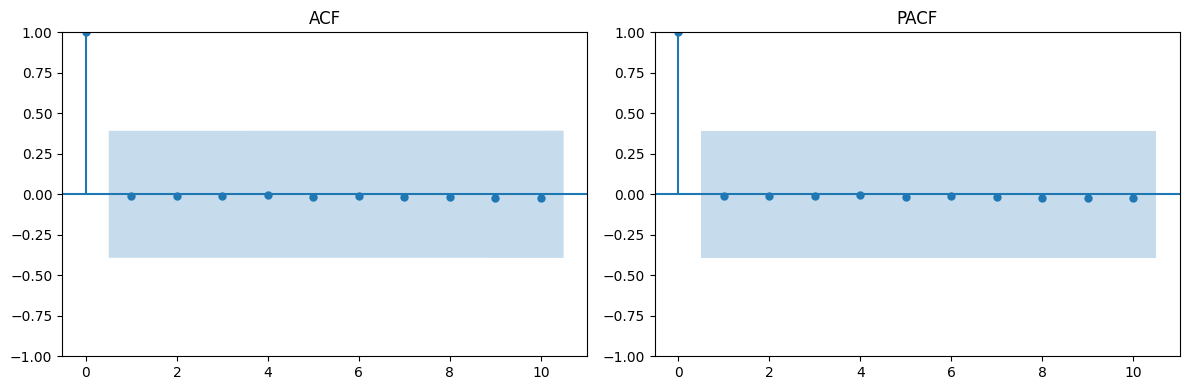

In [18]:
middleeast_northafrica_model.plot_acf_pacf(10)


In [19]:
results = middleeast_northafrica_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Dữ liệu ở Middle East và North Africa chủ yếu tỷ lệ tử vong không cao, năm 2023 có thảm hoạ lớn gây nhiễu mô hình dẫn tới sai số dự báo khá cao. Bên cạnh đó, ARIMA còn có MASE > 1 phản ánh rằng mô hình có hiệu quả thấp hơn naive forecast.
# Bộ số (1, 0, 1) tối ưu nhất

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 1)",155.78,2.5044,7.6252,1.1561,0.9,10
1,"(0, 0, 0)",152.50,2.5365,7.6108,1.1709,0.9,10
2,"(1, 0, 0)",154.50,2.8063,7.6684,1.2955,0.9,10
3,"(0, 0, 1)",154.50,3.0567,7.8005,1.4111,0.9,10


## 3.4. East Asia and Pacific

In [20]:
eastasia_pacific = prepare_level_data(df,level='region', filter='East Asia and Pacific')
eastasia_pacific

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,3379.0,1.971891e+09,0.171358
1,2001,3093.0,2.032373e+09,0.152187
2,2002,2928.0,2.049243e+09,0.142882
3,2003,2387.0,1.984705e+09,0.120270
4,2004,178682.0,2.073972e+09,8.615449
5,2005,3198.0,2.089030e+09,0.153085
6,2006,13857.0,2.105341e+09,0.658183
7,2007,3928.0,2.121472e+09,0.185154
8,2008,228537.0,2.108964e+09,10.836459
9,2009,4894.0,2.089570e+09,0.234211


In [21]:
eastasia_pacific_model = ARIMAModel(eastasia_pacific)
results = eastasia_pacific_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -3.389675
p-value        : 1.131592e-02
Stationary     : True

Critical Values:
   1% : -3.964443
   5% : -3.084908
   10% : -2.681814



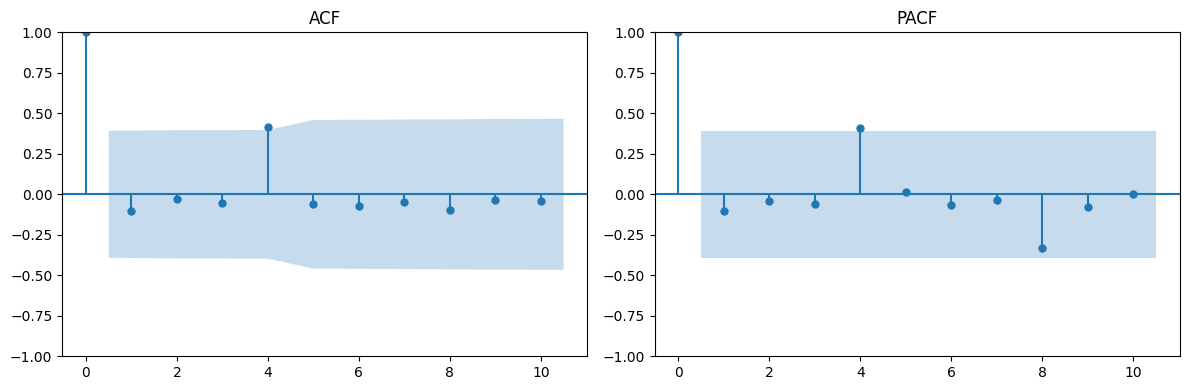

In [22]:
eastasia_pacific_model.plot_acf_pacf(10)
# Biểu đồ có lag 4 vượt khỏi vùng tin cậy, tuy nhiên nhìn các thành phần lag khác không có hiện tượng decay hoặc cutoff nên có thể nguyên nhân do dữ liệu chứa outlier nghiêm trọng ảnh hưởng

In [23]:
results = eastasia_pacific_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Kết quả cho thấy sai số vẫn cao nhưng MASE < 1 là dấu hiệu tích cực, bộ số (0, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",122.82,1.1538,1.1693,0.6495,1.0,10
1,"(1, 0, 0)",124.57,1.3388,1.3622,0.7536,1.0,10
2,"(0, 0, 1)",124.55,1.4886,1.5400,0.8379,1.0,10
3,"(1, 0, 1)",126.54,2.0532,2.1752,1.1557,1.0,10


## 3.5. Sub-Saharan Africa

In [24]:
subsaharan_africa = prepare_level_data(df,level='region', filter='Sub-Saharan Africa')
subsaharan_africa

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,6442.0,5.731780e+08,1.123909
1,2001,8971.0,6.201723e+08,1.446533
2,2002,6075.0,6.043178e+08,1.005266
3,2003,3188.0,6.521137e+08,0.488872
4,2004,3318.0,5.338604e+08,0.621511
5,2005,2962.0,7.124577e+08,0.415744
6,2006,6644.0,6.648678e+08,0.999296
7,2007,4959.0,7.753941e+08,0.639546
8,2008,7149.0,8.054151e+08,0.887617
9,2009,4270.0,8.112880e+08,0.526324


In [25]:
subsaharan_africa_model = ARIMAModel(subsaharan_africa)
results = subsaharan_africa_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -5.406215
p-value        : 3.286872e-06
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



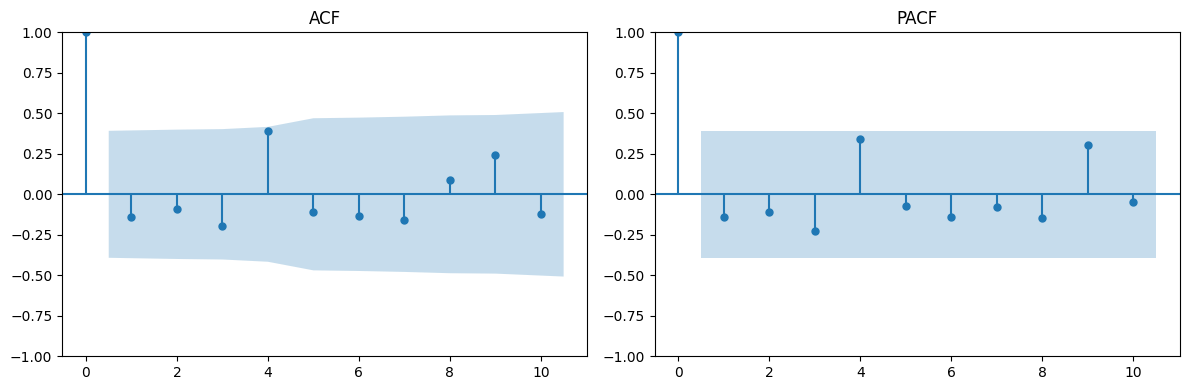

In [26]:
subsaharan_africa_model.plot_acf_pacf(10)

In [27]:
results = subsaharan_africa_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Tổng quan các chỉ số MAE và RMSE thấp, MASE nằm ở khoảng chấp nhận được
# Bộ tham số (0, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",52.33,0.3777,0.4447,0.6118,1.0,10
1,"(1, 0, 0)",53.87,0.3990,0.4679,0.6464,1.0,10
2,"(0, 0, 1)",53.70,0.4381,0.5554,0.7097,0.9,10
3,"(1, 0, 1)",55.40,0.5820,0.6462,0.9427,1.0,10


## 3.6. Latin America and Caribbean

In [28]:
america_caribbean = prepare_level_data(df, level='region', filter='Latin America and Caribbean')
america_caribbean

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,805.0,503689389.0,0.159821
1,2001,1863.0,493563164.0,0.377459
2,2002,871.0,526900614.0,0.165306
3,2003,1476.0,523913306.0,0.281726
4,2004,6620.0,514044654.0,1.287826
5,2005,2443.0,535800832.0,0.455953
6,2006,339.0,532272988.0,0.063689
7,2007,1763.0,522903587.0,0.337156
8,2008,1637.0,565354218.0,0.289553
9,2009,1318.0,541924117.0,0.243207


In [29]:
america_caribbean_model = ARIMAModel(america_caribbean)
america_caribbean_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -4.898187
p-value        : 3.515882e-05
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -4.898187205879098,
 'p-value': 3.5158819792176605e-05,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

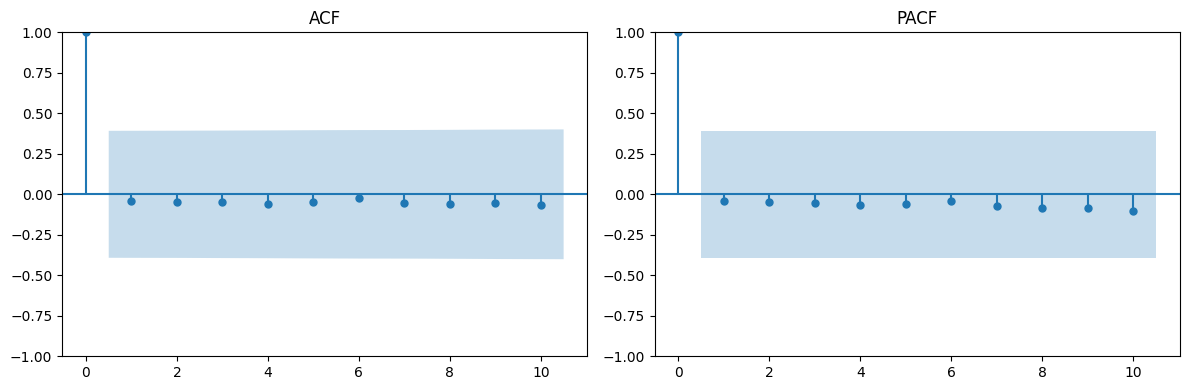

In [30]:
america_caribbean_model.plot_acf_pacf(10)

In [31]:
results = america_caribbean_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Chỉ số sai số khá cao, tuy nhiên MASE vẫn nằm trong khoảng chấp nhận
# Bộ tham số (0, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",178.51,2.1952,2.2219,0.6174,1.0,10
1,"(1, 0, 0)",180.46,2.3363,2.3690,0.6571,1.0,10
2,"(0, 0, 1)",180.46,2.3779,2.4138,0.6688,1.0,10
3,"(1, 0, 1)",180.65,3.4143,3.4726,0.9603,1.0,10


## 3.7. North America

In [32]:
north_america = prepare_level_data(df, level='region', filter='North America')
north_america

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,173.0,312848141.0,0.055298
1,2001,165.0,315989810.0,0.052217
2,2002,446.0,318984392.0,0.139819
3,2003,242.0,321812780.0,0.075199
4,2004,219.0,324744105.0,0.067438
5,2005,1977.0,327759331.0,0.603186
6,2006,339.0,330951105.0,0.102432
7,2007,358.0,334120093.0,0.107147
8,2008,303.0,337341264.0,0.089820
9,2009,147.0,340401598.0,0.043184


In [33]:
north_america_model = ARIMAModel(north_america)
north_america_model.adf_test(2)
# d = (0, 1, 2) chuỗi không dừng, quyết định gridsearch để đánh giá


========== ADF TEST RESULT ==========
Differencing (d): 2
ADF Statistic  : 1.226917
p-value        : 9.961667e-01
Stationary     : False

Critical Values:
   1% : -4.068854
   5% : -3.127149
   10% : -2.701730



{'ADF Statistic': 1.2269169380021594,
 'p-value': 0.9961666784002197,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 'Is Stationary': np.False_}

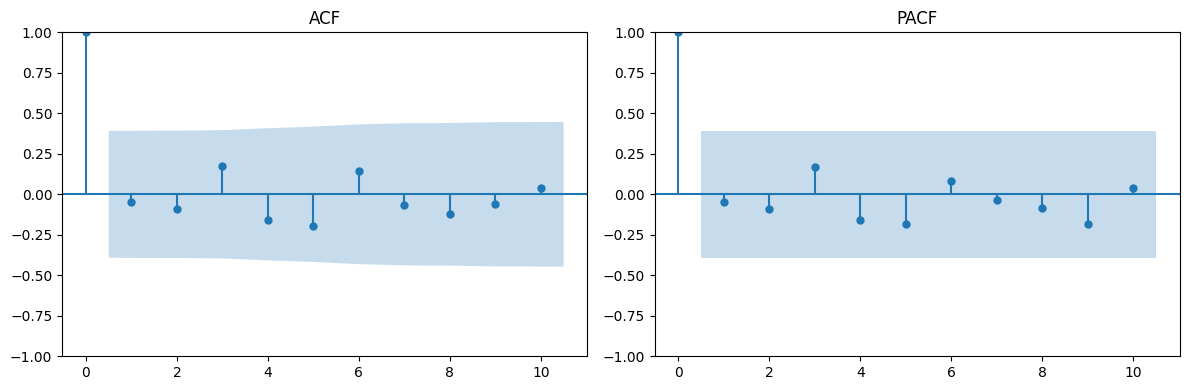

In [34]:
north_america_model.plot_acf_pacf()

In [35]:
results = north_america_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0, 1],
    q_list=[0, 1]
)
results
# Mặc dù sai số thấp nhưng do dữ liệu chủ yếu các năm đều thấp quanh 0, chỉ có vài năm shock lớn, coverage chỉ 80%, mô hình chưa bao phủ được
# Bộ tham số (0, 0, 0) tối ưu hơn

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 1, 1)",-19.72,0.0854,0.1358,0.7605,0.8,10
1,"(0, 0, 0)",-25.08,0.0855,0.1358,0.7606,0.8,10
2,"(1, 1, 1)",-17.72,0.0879,0.1362,0.7822,0.8,10
3,"(1, 0, 0)",-23.15,0.0911,0.1369,0.8110,0.8,10
4,"(0, 0, 1)",-23.17,0.0940,0.1378,0.8366,0.8,10
5,"(1, 1, 0)",-12.56,0.1004,0.1558,0.8934,0.9,10
6,"(0, 1, 0)",-8.91,0.1061,0.1682,0.9445,0.9,10
7,"(1, 0, 1)",-21.17,0.1149,0.1458,1.0231,0.8,10


# 4. Country Level

In [36]:
# Các quốc gia được lựa chọn để nghiên cứu (đủ dữ liệu >= 24 năm)
# Viet Nam, Japan,
# France, Italy,
# Brazil, Mexico,
# Sudan,Türkiye,
# Canada,United States of America,
# Indian, Pakistan,
# South Africa, Kenya

## 4.1. Viet Nam

In [37]:
viet_nam = prepare_level_data(df, level='country', filter='Viet Nam')
viet_nam

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,592.0,77154011.0,0.767296
1,2001,392.0,77969361.0,0.502762
2,2002,147.0,78772224.0,0.186614
3,2003,143.0,79563777.0,0.179730
4,2004,189.0,80338971.0,0.235253
5,2005,324.0,81088313.0,0.399564
6,2006,579.0,82167897.0,0.704655
7,2007,353.0,83633375.0,0.422080
8,2008,411.0,85175788.0,0.482531
9,2009,356.0,86460018.0,0.411751


In [38]:
viet_nam_model = ARIMAModel(viet_nam)
test = viet_nam_model.adf_test(0)
print(test)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -3.384872
p-value        : 1.148552e-02
Stationary     : True

Critical Values:
   1% : -3.859073
   5% : -3.042046
   10% : -2.660906

{'ADF Statistic': -3.3848720130877603, 'p-value': 0.01148552202789282, 'Critical Values': {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}, 'Is Stationary': np.True_}


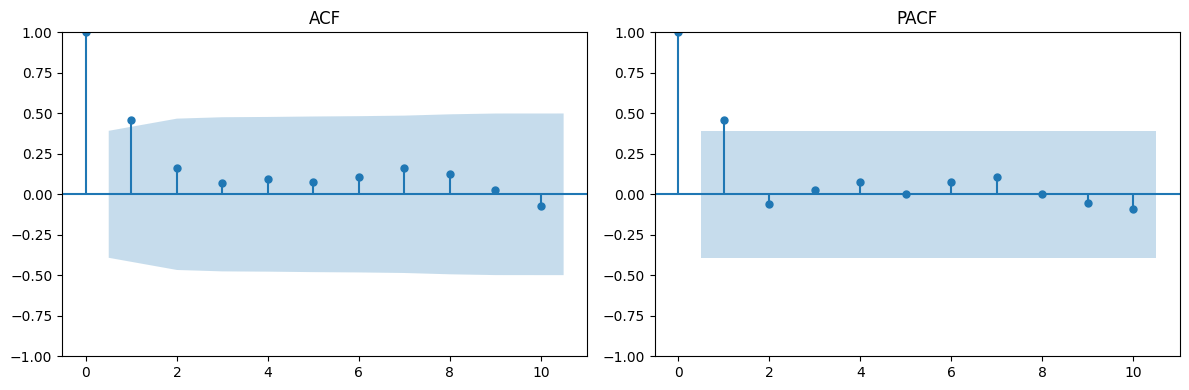

In [39]:
viet_nam_model.plot_acf_pacf()

In [40]:
results = viet_nam_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Kết quả cho thấy bộ (1, 0, 0) tối ưu, mặc dù (0, 0, 0) nhỉnh hơn về coverage nhưng mase > 1
# Ngoài ra, mô hình cũng không hiệu quả khi độ dự báo chỉ cao hơn mô hình dự báo ngây thơ 5- 10%

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 1)",-9.89,0.1390,0.1714,0.9121,0.9,10
1,"(1, 0, 0)",-11.67,0.1450,0.1648,0.9515,0.9,10
2,"(0, 0, 1)",-10.30,0.1463,0.1771,0.9599,0.9,10
3,"(0, 0, 0)",-5.54,0.1695,0.1928,1.1118,1.0,10


## 4.2. Japan

In [41]:
japan = prepare_level_data(df, level='country', filter='Japan')
japan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,32.0,126843000.0,0.025228
1,2001,25.0,127149000.0,0.019662
2,2002,7.0,127445000.0,0.005493
3,2003,46.0,127718000.0,0.036017
4,2004,271.0,127761000.0,0.212115
5,2005,136.0,127773000.0,0.106439
6,2006,62.0,127854000.0,0.048493
7,2007,87.0,128001000.0,0.067968
8,2008,76.0,128063000.0,0.059346
9,2009,77.0,128047000.0,0.060134


In [42]:
japan_model = ARIMAModel(japan)
japan_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -4.890222
p-value        : 3.643538e-05
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -4.890221951220118,
 'p-value': 3.6435380051743114e-05,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

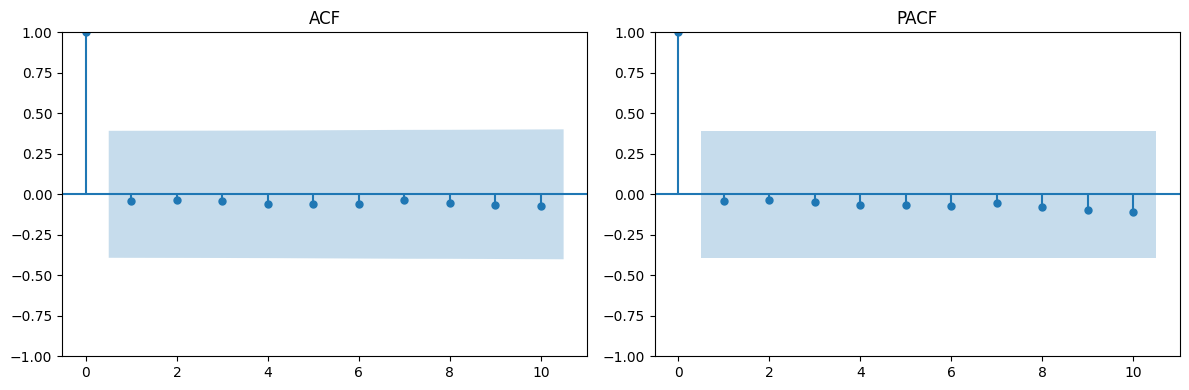

In [43]:
japan_model.plot_acf_pacf()

In [44]:
results = japan_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Sai số và coverage ổn định do dữ liệu ít biến động lớn
# Bộ (0, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",130.54,0.7670,0.8026,0.5537,1.0,10
1,"(1, 0, 0)",132.50,0.8141,0.8507,0.5877,1.0,10
2,"(0, 0, 1)",132.50,0.8244,0.8617,0.5952,1.0,10
3,"(1, 0, 1)",132.60,0.8963,0.9495,0.6471,1.0,10


## 4.3. France

In [45]:
france = prepare_level_data(df, level='country', filter='France')
france

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,9.0,60918661.0,0.014774
1,2001,17.0,61364377.0,0.027703
2,2002,30.0,61812142.0,0.048534
3,2003,19511.0,62249855.0,31.343045
4,2004,11.0,62707588.0,0.017542
5,2005,13.0,63180854.0,0.020576
6,2006,1393.0,63622342.0,2.189482
7,2007,5.0,64016890.0,0.007810
8,2008,3.0,64375116.0,0.004660
9,2009,18.0,64706436.0,0.027818


In [46]:
france_model = ARIMAModel(france)
france_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -5.123498
p-value        : 1.257132e-05
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -5.1234981637547925,
 'p-value': 1.2571323434200582e-05,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

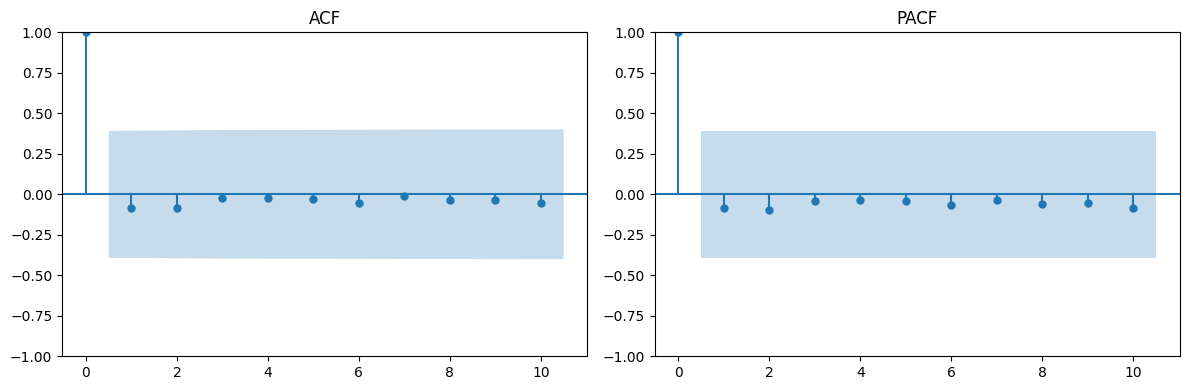

In [47]:
france_model.plot_acf_pacf(10)

In [48]:
france_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
# MAE và RMSE lớn
# Bộ tham số (0, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",166.31,2.0688,2.4165,0.5314,1.0,10
1,"(1, 0, 0)",168.13,2.1052,2.4207,0.5407,1.0,10
2,"(0, 0, 1)",168.09,2.1236,2.4262,0.5455,1.0,10
3,"(1, 0, 1)",168.33,2.3214,2.6505,0.5963,1.0,10


## 4.4. Italy

In [49]:
italy = prepare_level_data(df, level='country', filter='Italy')
italy

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,44.0,56942108.0,0.077271
1,2001,0.0,56976981.0,0.000000
2,2002,37.0,57089824.0,0.064810
3,2003,20092.0,57399184.0,35.003982
4,2004,2.0,57828179.0,0.003459
5,2005,9.0,58166682.0,0.015473
6,2006,5.0,58399861.0,0.008562
7,2007,17.0,58756247.0,0.028933
8,2008,9.0,59211181.0,0.015200
9,2009,340.0,59555454.0,0.570896


In [51]:
italy_model = ARIMAModel(italy)
italy_model.adf_test(1)
# d = 1 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 1
ADF Statistic  : -7.518734
p-value        : 3.840954e-11
Stationary     : True

Critical Values:
   1% : -3.752928
   5% : -2.998500
   10% : -2.638967



{'ADF Statistic': -7.518734298002057,
 'p-value': 3.840953605574747e-11,
 'Critical Values': {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 'Is Stationary': np.True_}

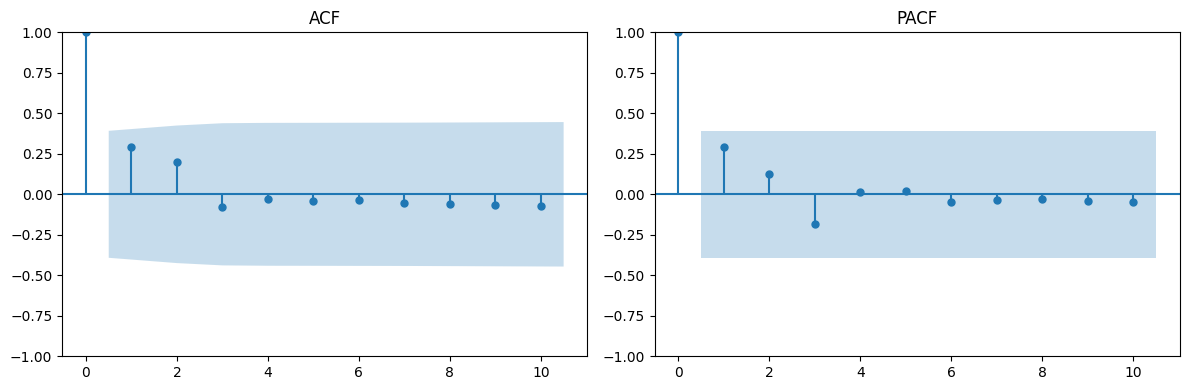

In [52]:
italy_model.plot_acf_pacf(10)

In [54]:
results = italy_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[1],
    q_list=[0, 1]
)
results
# Sai số là rất lớn, MASE > 0.8 cho thấy mô hình không có hiệu quả nhiều so với naive forecast
# Bộ số (1, 1, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 1, 0)",186.93,4.3825,10.0544,0.8575,0.9,10
1,"(0, 1, 0)",190.20,5.1186,10.6238,1.0015,0.9,10
2,"(0, 1, 1)",186.54,7.9679,12.6297,1.5590,0.7,10
3,"(1, 1, 1)",188.43,8.5021,13.5542,1.6635,0.7,10


## 4.5. Brazil

In [55]:
brazil = prepare_level_data(df, level='country', filter='Brazil')
brazil

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,108.0,174018282.0,0.062062
1,2001,98.0,176301203.0,0.055587
2,2002,161.0,178503484.0,0.090194
3,2003,255.0,180622688.0,0.141178
4,2004,39.0,182675143.0,0.021349
5,2005,49.0,184688101.0,0.026531
6,2006,20.0,186653106.0,0.010715
7,2007,70.0,188552320.0,0.037125
8,2008,326.0,190367302.0,0.171248
9,2009,191.0,192079951.0,0.099438


In [56]:
brazil_model = ARIMAModel(brazil)
brazil_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -4.357517
p-value        : 3.526593e-04
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -4.357516864126925,
 'p-value': 0.00035265931417410114,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

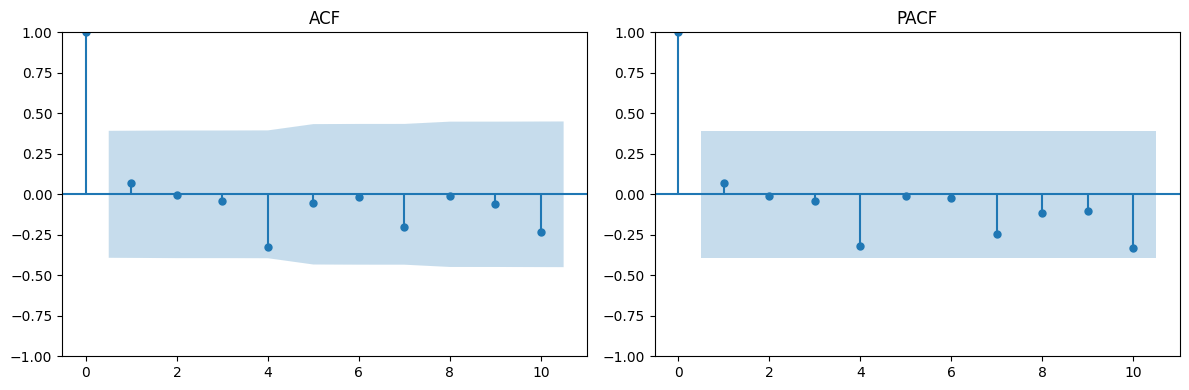

In [57]:
brazil_model.plot_acf_pacf(10)

In [59]:
results = brazil_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Sai số nhỏ, MASE mức chấp nhận
# Bộ số (1, 0, 1) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 1)",-33.93,0.0559,0.0724,0.5847,0.9,10
1,"(0, 0, 0)",-37.80,0.0592,0.0741,0.6193,1.0,10
2,"(1, 0, 0)",-35.92,0.0601,0.0751,0.6288,1.0,10
3,"(0, 0, 1)",-35.93,0.0605,0.0752,0.6328,0.9,10


## 4.6. Mexico

In [60]:
mexico = prepare_level_data(df, level='country', filter='Mexico')
mexico

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,236.0,98625552.0,0.239289
1,2001,26.0,100099099.0,0.025974
2,2002,103.0,101548624.0,0.101429
3,2003,70.0,102978515.0,0.067975
4,2004,52.0,104394131.0,0.049811
5,2005,88.0,105811504.0,0.083167
6,2006,41.0,107253666.0,0.038227
7,2007,58.0,108774360.0,0.053321
8,2008,36.0,110374288.0,0.032616
9,2009,32.0,111999721.0,0.028571


In [61]:
mexico_model = ARIMAModel(mexico)
mexico_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -5.899740
p-value        : 2.796316e-07
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -5.8997396117386245,
 'p-value': 2.7963162240687744e-07,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

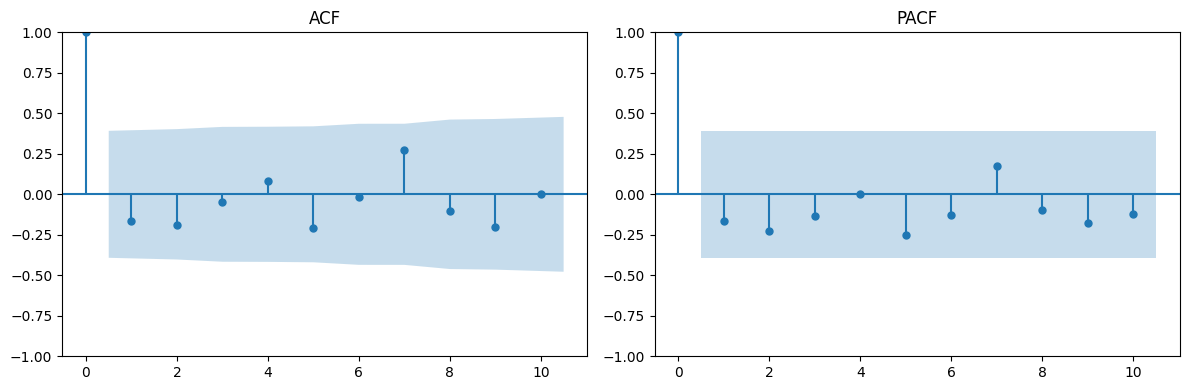

In [62]:
mexico_model.plot_acf_pacf()

In [64]:
results = mexico_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Sai số nhỏ, MASE cao
# Bộ số (1, 0, 1) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 1)",-48.30,0.0678,0.1126,0.7966,0.9,10
1,"(0, 0, 0)",-47.58,0.0715,0.1137,0.8395,0.9,10
2,"(1, 0, 0)",-46.37,0.0806,0.1179,0.9469,0.9,10
3,"(0, 0, 1)",-47.25,0.0830,0.1199,0.9746,0.9,10


## 4.7. Sudan

In [65]:
sudan = prepare_level_data(df, level='country', filter='Sudan')
sudan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,186.0,27816745.0,0.668662
1,2001,3.0,28516770.0,0.010520
2,2002,82.0,29228727.0,0.280546
3,2003,47.0,29896035.0,0.157211
4,2004,98.0,30556637.0,0.320716
5,2005,655.0,31262444.0,2.095166
6,2006,1169.0,31992435.0,3.653989
7,2007,734.0,32764135.0,2.240254
8,2008,15.0,33623980.0,0.044611
9,2009,20.0,34569113.0,0.057855


In [66]:
sudan_model = ARIMAModel(sudan)
sudan_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -3.055236
p-value        : 3.004824e-02
Stationary     : True

Critical Values:
   1% : -3.889266
   5% : -3.054358
   10% : -2.666984



{'ADF Statistic': -3.055235801316705,
 'p-value': 0.030048235972539205,
 'Critical Values': {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045},
 'Is Stationary': np.True_}

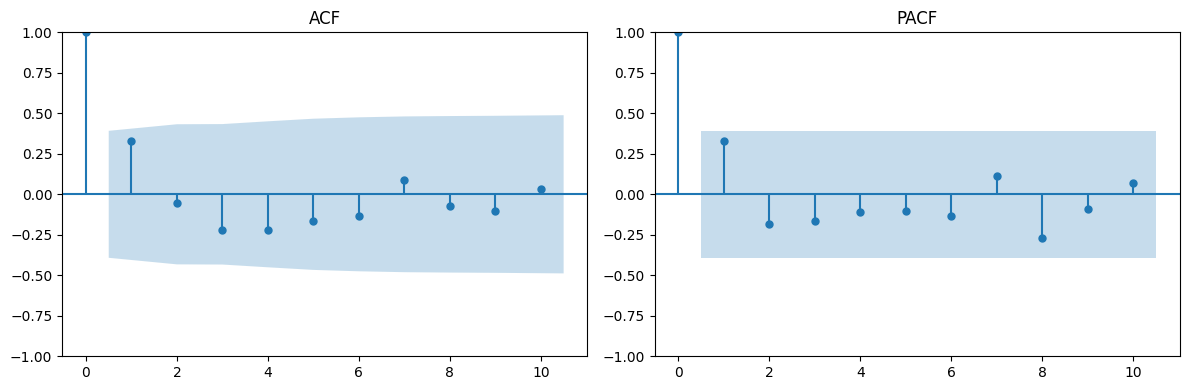

In [67]:
sudan_model.plot_acf_pacf(10)

In [69]:
results = sudan_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# MASE cao, mô hình không hiệu quả hơn Naive Forecast
# Bộ số (1, 0, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 0)",73.72,0.6533,1.0788,0.9625,0.9,10
1,"(0, 0, 0)",75.52,0.6987,0.9807,1.0293,0.9,10
2,"(0, 0, 1)",69.19,0.8428,1.1260,1.2417,0.8,10
3,"(1, 0, 1)",70.96,0.8996,1.2024,1.3254,0.8,10


## 4.8. Türkiye

In [70]:
turky = prepare_level_data(df, level='country', filter='Türkiye')
turky

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,16.0,65425961.0,0.024455
1,2001,50.0,66245128.0,0.075477
2,2002,86.0,67048795.0,0.128265
3,2003,177.0,67831730.0,0.260940
4,2004,79.0,68592617.0,0.115173
5,2005,43.0,69329557.0,0.062023
6,2006,79.0,70045349.0,0.112784
7,2007,19.0,70158112.0,0.027082
8,2008,2.0,71051678.0,0.002815
9,2009,58.0,72039206.0,0.080512


In [72]:
turky_model = ARIMAModel(turky)
turky_model.adf_test(0)
# d = 0 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 0
ADF Statistic  : -4.914019
p-value        : 3.274808e-05
Stationary     : True

Critical Values:
   1% : -3.737709
   5% : -2.992216
   10% : -2.635747



{'ADF Statistic': -4.91401906205977,
 'p-value': 3.27480779716588e-05,
 'Critical Values': {'1%': -3.7377092158564813,
  '5%': -2.9922162731481485,
  '10%': -2.635746736111111},
 'Is Stationary': np.True_}

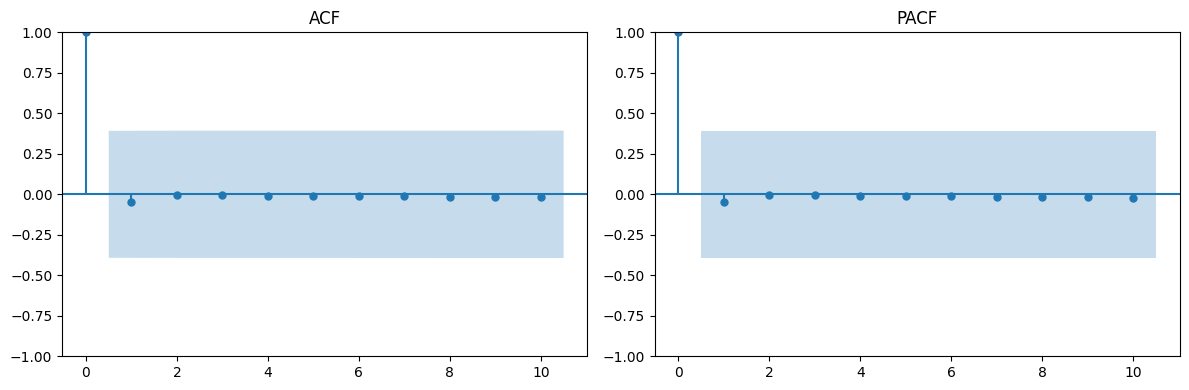

In [73]:
turky_model.plot_acf_pacf()

In [74]:
results = turky_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0],
    q_list=[0, 1]
)
results
# Sai số lớn bất thường, MASE hoàn toàn thua Naive, cho thấy dữ liệu có spike cực lớn năm 2023 do Thổ Nhĩ Kỳ phải hứng chịu 2 cơn đại địa chấn khiến nhiều người thiệt mạng


D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 0, 0)",201.83,6.4957,19.6424,1.2249,0.9,10
1,"(0, 0, 0)",199.88,6.5540,19.6502,1.2359,0.9,10
2,"(0, 0, 1)",201.83,6.5872,19.6537,1.2422,0.9,10
3,"(1, 0, 1)",203.15,6.8430,19.6865,1.2904,0.9,10


## 4.9. Canada

In [76]:
canada = prepare_level_data(df, level='country', filter='Canada')
canada

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,11.0,30685730.0,0.035847
1,2001,12.0,31020855.0,0.038684
2,2002,2.0,31359199.0,0.006378
3,2003,7.0,31642461.0,0.022122
4,2004,0.0,31938807.0,0.000000
5,2005,4.0,32242732.0,0.012406
6,2006,1.0,32571193.0,0.003070
7,2007,6.0,32888886.0,0.018243
8,2008,0.0,33247298.0,0.000000
9,2009,2.0,33630069.0,0.005947


In [80]:
canada_model = ARIMAModel(canada)
canada_model.adf_test(2)
# d = 0, 1, 2 chuỗi không dừng, gridsearch


========== ADF TEST RESULT ==========
Differencing (d): 2
ADF Statistic  : -1.039539
p-value        : 7.385717e-01
Stationary     : False

Critical Values:
   1% : -4.068854
   5% : -3.127149
   10% : -2.701730



{'ADF Statistic': -1.0395389507428154,
 'p-value': 0.7385717070674956,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 'Is Stationary': np.False_}

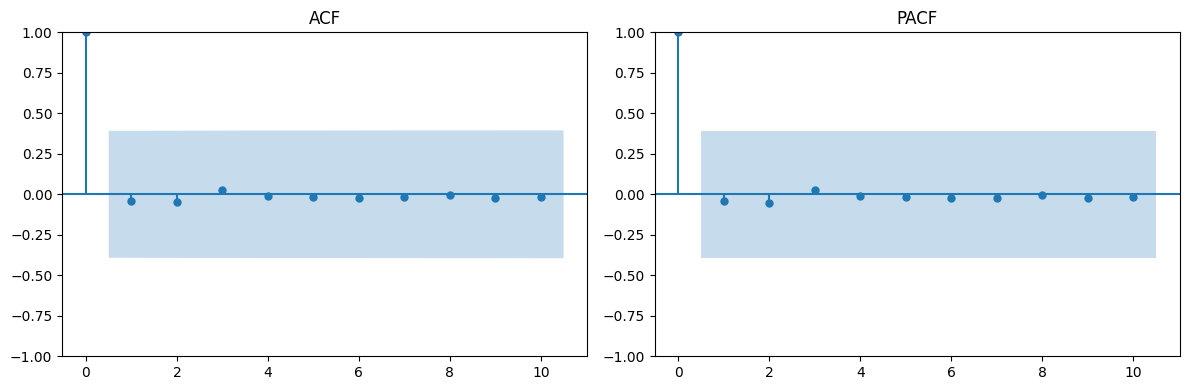

In [81]:
canada_model.plot_acf_pacf()

In [82]:
results = canada_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0, 1],
    q_list=[0, 1]
)
results
# MASE lớn mô hình dự báo kém hơn naive
# Bộ số (0, 0, 0) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",31.45,0.2636,0.6778,1.2845,0.8,10
1,"(1, 0, 0)",33.41,0.2907,0.6846,1.4164,0.8,10
2,"(0, 0, 1)",33.40,0.2927,0.6825,1.4264,0.7,10
3,"(1, 0, 1)",34.69,0.3035,0.6925,1.4792,0.6,10
4,"(0, 1, 1)",34.42,0.4019,0.7698,1.9584,0.7,10
5,"(1, 1, 1)",36.38,0.4605,0.8107,2.2443,0.4,10
6,"(0, 1, 0)",46.88,0.4664,0.9546,2.2730,0.6,10
7,"(1, 1, 0)",42.37,0.6250,1.0548,3.0455,0.3,10


## 4.10. United States of America

In [83]:
america = prepare_level_data(df, level='country', filter='United States of America')
america

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,162.0,282162411.0,0.057414
1,2001,153.0,284968955.0,0.053690
2,2002,444.0,287625193.0,0.154368
3,2003,231.0,290107933.0,0.079626
4,2004,219.0,292805298.0,0.074794
5,2005,1973.0,295516599.0,0.667644
6,2006,338.0,298379912.0,0.113278
7,2007,352.0,301231207.0,0.116854
8,2008,303.0,304093966.0,0.099640
9,2009,145.0,306771529.0,0.047266


In [86]:
america_model = ARIMAModel(america)
america_model.adf_test(2)
# d = (0, 1, 2) chuỗi chưa dừng


========== ADF TEST RESULT ==========
Differencing (d): 2
ADF Statistic  : 0.823948
p-value        : 9.920131e-01
Stationary     : False

Critical Values:
   1% : -4.068854
   5% : -3.127149
   10% : -2.701730



{'ADF Statistic': 0.8239479473705277,
 'p-value': 0.9920130615008541,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 'Is Stationary': np.False_}

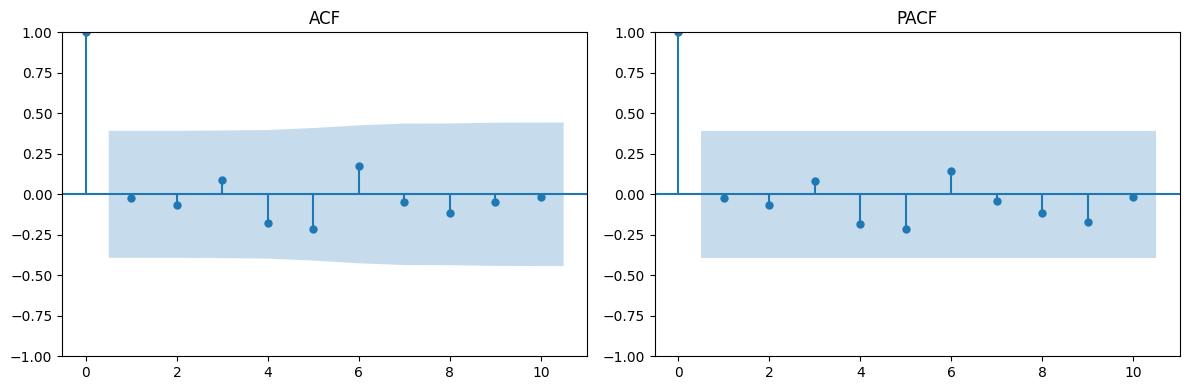

In [87]:
america_model.plot_acf_pacf()

In [89]:
results = america_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0, 1],
    q_list=[0, 1]
)
results
# Bộ số (1, 1, 0) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 1, 0)",-13.23,0.0605,0.1052,0.5802,0.9,10
1,"(0, 1, 0)",-9.79,0.0688,0.1055,0.6604,1.0,10
2,"(0, 1, 1)",-19.39,0.0752,0.1103,0.7212,0.9,10
3,"(0, 0, 0)",-24.74,0.0752,0.1103,0.7213,0.9,10
4,"(1, 1, 1)",-17.40,0.0762,0.1108,0.7311,0.9,10
5,"(1, 0, 0)",-22.76,0.0785,0.1118,0.7529,0.9,10
6,"(0, 0, 1)",-22.76,0.0799,0.1124,0.7665,0.9,10
7,"(1, 0, 1)",-20.78,0.0955,0.1210,0.9160,0.9,10


## 4.11. Indian

In [90]:
india = prepare_level_data(df, level='country', filter='India')
india

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,2810.0,1.057923e+09,0.265615
1,2001,21045.0,1.077899e+09,1.952410
2,2002,2991.0,1.097600e+09,0.272504
3,2003,2251.0,1.116803e+09,0.201557
4,2004,17737.0,1.135992e+09,1.561367
5,2005,5041.0,1.154676e+09,0.436573
6,2006,1431.0,1.172879e+09,0.122007
7,2007,2236.0,1.190676e+09,0.187792
8,2008,1808.0,1.207931e+09,0.149677
9,2009,2204.0,1.225525e+09,0.179841


In [92]:
india_model = ARIMAModel(india)
india_model.adf_test(1)
# d = 1 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 1
ADF Statistic  : -4.275848
p-value        : 4.889919e-04
Stationary     : True

Critical Values:
   1% : -3.924019
   5% : -3.068498
   10% : -2.673893



{'ADF Statistic': -4.27584808325199,
 'p-value': 0.0004889919454469094,
 'Critical Values': {'1%': -3.9240193847656246,
  '5%': -3.0684982031250003,
  '10%': -2.67389265625},
 'Is Stationary': np.True_}

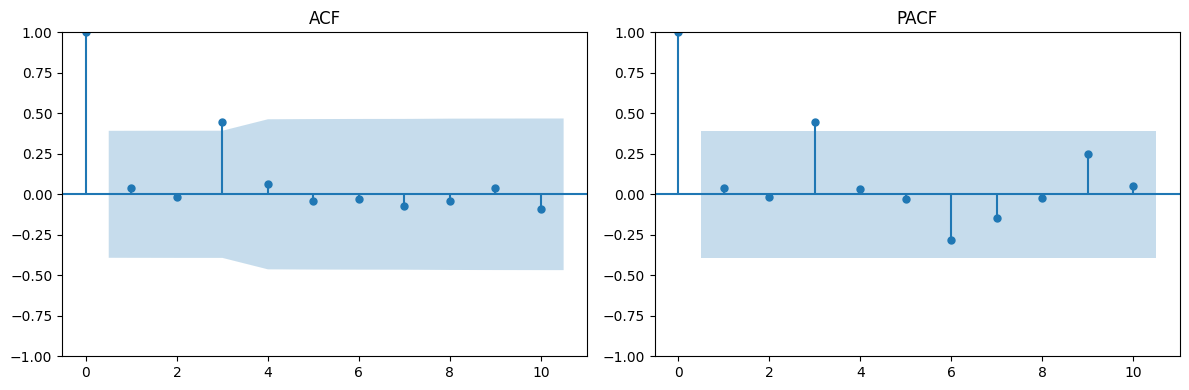

In [93]:
india_model.plot_acf_pacf()

In [95]:
results = india_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[1],
    q_list=[0, 1]
)
results
# Chỉ số MAE, RMSE ổn, MASE thấp, mô hình arima hiệu quả ở khu vực này
# Bộ số (1, 1, 1) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 1, 1)",35.20,0.0348,0.0511,0.1027,1.0,10
1,"(1, 1, 0)",41.36,0.0351,0.0467,0.1037,1.0,10
2,"(0, 1, 1)",34.83,0.0471,0.0676,0.1391,1.0,10
3,"(0, 1, 0)",47.74,0.0659,0.0898,0.1946,1.0,10


## 4.12. Pakistan

In [96]:
pakistan = prepare_level_data(df, level='country', filter='Pakistan')
pakistan

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,133.0,154879127.0,0.085873
1,2001,257.0,159270907.0,0.161360
2,2002,213.0,163222549.0,0.130497
3,2003,529.0,167110248.0,0.316557
4,2004,31.0,171286000.0,0.018098
5,2005,74204.0,175453212.0,42.292757
6,2006,513.0,179682690.0,0.285503
7,2007,911.0,184493231.0,0.493785
8,2008,249.0,189499113.0,0.131399
9,2009,102.0,194376534.0,0.052475


In [98]:
pakistan_model = ARIMAModel(pakistan)
pakistan_model.adf_test(1)
# d = 1 chuỗi dừng


========== ADF TEST RESULT ==========
Differencing (d): 1
ADF Statistic  : -3.399371
p-value        : 1.098033e-02
Stationary     : True

Critical Values:
   1% : -3.809209
   5% : -3.021645
   10% : -2.650713



{'ADF Statistic': -3.399371164181336,
 'p-value': 0.010980327265939926,
 'Critical Values': {'1%': -3.8092091249999998,
  '5%': -3.0216450000000004,
  '10%': -2.6507125},
 'Is Stationary': np.True_}

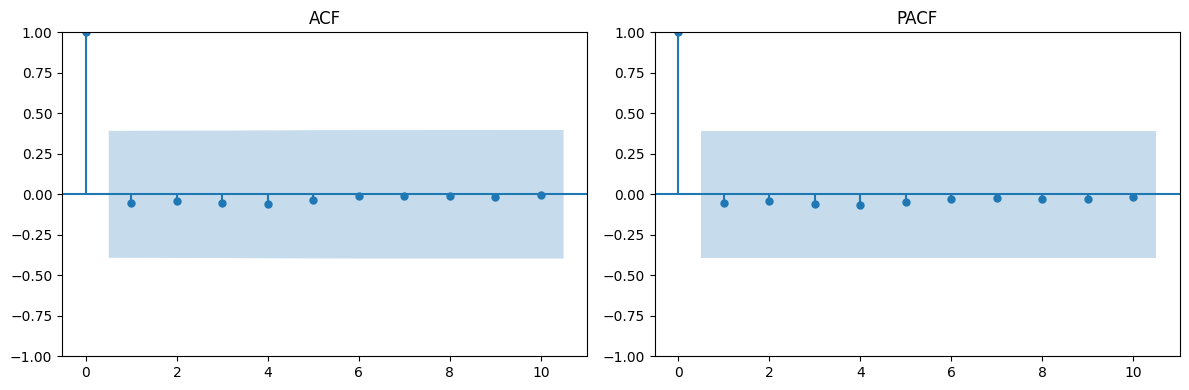

In [99]:
pakistan_model.plot_acf_pacf()

In [101]:
results = pakistan_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[1],
    q_list=[0, 1]
)
results
# Sai số tạm ổn, MASE nhỏ
# Bộ số (1, 1, 0) tối ưu

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(1, 1, 0)",185.25,0.2588,0.3300,0.0683,1.0,10
1,"(0, 1, 0)",190.07,0.3262,0.4239,0.0861,1.0,10
2,"(0, 1, 1)",177.50,2.1745,2.2118,0.5740,1.0,10
3,"(1, 1, 1)",179.50,2.2092,2.2471,0.5831,1.0,10


## 4.13. South Africa

In [102]:
south_africa = prepare_level_data(df, level= 'country', filter='South Africa')
south_africa

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,268.0,47159719.0,0.568282
1,2001,50.0,47566800.0,0.105115
2,2002,126.0,48019415.0,0.262394
3,2003,1.0,48500348.0,0.002062
4,2004,5.0,48991421.0,0.010206
5,2005,2.0,49490033.0,0.004041
6,2006,12.0,49998277.0,0.024001
7,2007,48.0,50528584.0,0.094996
8,2008,115.0,51114599.0,0.224985
9,2009,32.0,51728516.0,0.061861


In [106]:
south_africa_model = ARIMAModel(south_africa)
south_africa_model.adf_test(2)
# d = (0, 1, 2) chuỗi chưa dừng


========== ADF TEST RESULT ==========
Differencing (d): 2
ADF Statistic  : 4.572502
p-value        : 1.000000e+00
Stationary     : False

Critical Values:
   1% : -4.068854
   5% : -3.127149
   10% : -2.701730



{'ADF Statistic': 4.572501544946185,
 'p-value': 1.0,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 'Is Stationary': False}

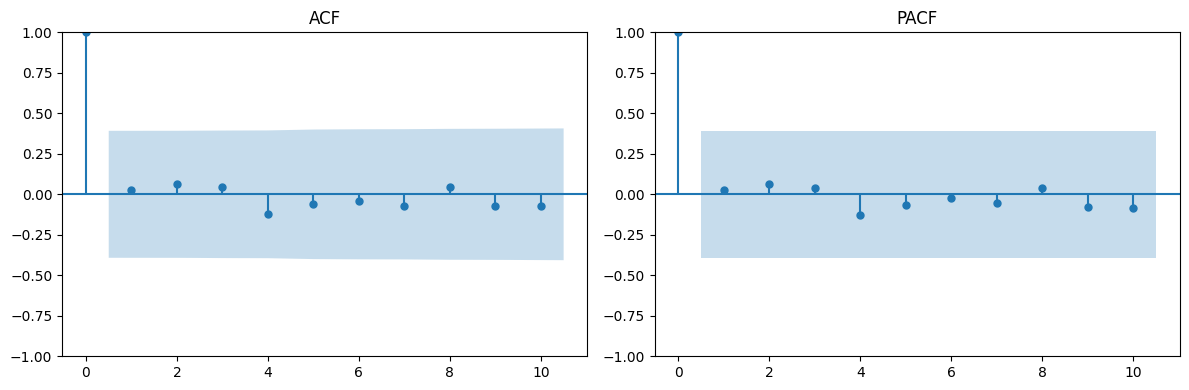

In [107]:
south_africa_model.plot_acf_pacf()

In [109]:
results = south_africa_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0, 1],
    q_list=[0, 1]
)
results
# MASE lớn mô hình có sai số trung bình tuyệt đối lớn hơn naive
# Bộ số (0, 0, 0) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",-5.06,0.1328,0.2719,0.8655,0.9,10
1,"(0, 0, 1)",-3.08,0.1474,0.2759,0.9607,0.9,10
2,"(1, 0, 0)",-3.08,0.1537,0.2795,1.0015,0.9,10
3,"(1, 0, 1)",-1.99,0.1544,0.2832,1.0062,0.9,10
4,"(0, 1, 1)",-0.48,0.1856,0.3205,1.2093,0.8,10
5,"(1, 1, 1)",1.37,0.2136,0.3511,1.3916,0.7,10
6,"(0, 1, 0)",7.82,0.2244,0.3778,1.4621,0.8,10
7,"(1, 1, 0)",3.50,0.2248,0.3717,1.4649,0.7,10


## 4.14. Kenya

In [110]:
kenya = prepare_level_data(df, level='country', filter='Kenya')
kenya

,Year,Total_Deaths,Population,Mortality_Rate
0,2000,50.0,30642890.0,0.163170
1,2001,40.0,31619170.0,0.126506
2,2002,101.0,32629808.0,0.309533
3,2003,40.0,33652223.0,0.118863
4,2004,143.0,34713455.0,0.411944
5,2005,106.0,35796484.0,0.296118
6,2006,395.0,36904008.0,1.070344
7,2007,39.0,38036349.0,0.102534
8,2008,112.0,39206351.0,0.285668
9,2009,307.0,40408891.0,0.759734


In [113]:
kenya_model = ARIMAModel(kenya)
kenya_model.adf_test(2)
# d= (0, 1, 2) chuỗi chưa dừng


========== ADF TEST RESULT ==========
Differencing (d): 2
ADF Statistic  : -1.967387
p-value        : 3.010531e-01
Stationary     : False

Critical Values:
   1% : -4.068854
   5% : -3.127149
   10% : -2.701730



{'ADF Statistic': -1.9673873887618536,
 'p-value': 0.30105305668673776,
 'Critical Values': {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 'Is Stationary': np.False_}

In [114]:
results = kenya_model.grid_search_expanding(
    p_list=[0, 1],
    d_list=[0, 1],
    q_list=[0, 1]
)
results
# MASE vẫn còn lớn
# Bộ số (0, 0, 0) tối ưu

D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Data\uel\HK7\Sources\Mortality_Rate_Forecasting\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

,Order,AIC,MAE,RMSE,MASE,Coverage_90%,n_forecasts
0,"(0, 0, 0)",4.37,0.1590,0.1957,0.6116,1.0,10
1,"(0, 1, 1)",8.55,0.1590,0.1957,0.6116,1.0,10
2,"(1, 1, 1)",10.55,0.1591,0.1971,0.6120,1.0,10
3,"(1, 0, 0)",6.32,0.1610,0.1976,0.6193,1.0,10
4,"(0, 0, 1)",6.31,0.1617,0.1982,0.6219,1.0,10
5,"(1, 0, 1)",6.29,0.1668,0.2028,0.6416,1.0,10
6,"(1, 1, 0)",15.71,0.1814,0.2181,0.6978,1.0,10
7,"(0, 1, 0)",19.71,0.2002,0.2482,0.7703,1.0,10
